In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

pd.set_option('display.max_columns', None)

In [70]:
df = pd.read_csv("..\data\INFLUD25-04-08-2025.csv", sep=';', encoding='latin1', low_memory=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lineker.aguiar_indic\AppData\Local\Temp\ipykernel_18952\2574008017.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\INFLUD25-04-08-2025.csv", sep=';', encoding='latin1', low_memory=False)


In [71]:
df.shape

(213808, 194)

In [72]:
df.head()

,NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,TABAG,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,NM_UN_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,POV_CT,TP_POV_CT,TEM_CPF,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,DOSE_2REF,DOSE_ADIC,DOS_RE_BI,FAB_COV_1,FAB_COV_2,FAB_COVRF,FAB_COVRF2,FAB_ADIC,FAB_RE_BI,LOTE_1_COV,LOTE_2_COV,LOTE_REF,LOTE_REF2,LOTE_ADIC,LOT_RE_BI,FNT_IN_COV,TRAT_COV,TIPO_TRAT,DT_TRT_COV,OUT_TRAT,SURTO_SG,CO_DETEC,VG_OMS,VG_OMSOUT,VG_LIN,VG_MET,VG_METOUT,VG_DTRES,VG_ENC,VG_REINF,VG_CODEST,REINF
0,31735451969802,2024-12-29,1,2024-12-29,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880,M,1961-09-19,63,3,3063,6,4,NaN,9.0,BRASIL,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880.0,1.0,9.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,9.0,NaN,NaN,1.0,2024-12-29,1.0,NaN,2.0,2025-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,2025-01-01,2025-01-13,2024-12-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0,2024-12-29,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,2.0,1.0,18/05/2021,10/08/2021,26/07/2022,26/07/2022,NaN,10/11/2023,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,NaN,103 - COVID-19 PFIZER - COMIRNATY BIVALENTE,214VCD057Z,216VCD202W,221VCD028W,221VCD028W,NaN,GK0280,2,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,31735516593521,2024-12-29,1,2024-12-29,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880,F,2024-11-08,1,2,2001,6,1,NaN,0.0,BRASIL,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,9.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2024-12-29,1.0,2024-12-29,1.0,NaN,2.0,2025-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,2025-01-06,2025-01-13,2024-12-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,9.0,9.0,6.0,NaN,NaN,2.0,2024-12-29,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,31735544021940,2024-12-29,1,2024-12-29,1,SP,GVE XXIX SAO JOSE DO RIO P

# Columns Selection

- Nós temos cinco principais questões para serem respondias pela PoC. Com base nelas, podemos também listar as principais colunas.

1. Taxa de aumento de casos.

    1.1. **DT_SIN_PRI**: Data que marca o início do caso

    1.2. **DT_NOTIFIC**: Data de notificação.
    
2. Taxa de mortalidade.

    2.1. **EVOLUCAO**: Situação final do caso.

        1 = Cura.

        2 = Óbito.

        3 = Óbito por outras causas.
    
    2.2. **DT_EVOLUCAO**: Data do desfecho (alta ou óbito).

    2.3. **CLASSI_FIN**: Confirma se é SRAG por COVID-19 (valor 5) ou outras causas

3. Taxa de ocupação de UTI.

    3.1. **HOSPITAL**: Informa se houve internação

    3.2. **UTI**: Informa se houve internação em UTI

    3.3. **DT_ENTUTI** e **DT_SAIDUTI**: Datas de entrada e saída da UTI – permitem calcular tempo de permanência

4. Taxa de Vacinação da População.

    4.1. **VACINA_COV**: Indica se o paciente foi vacinado

    4.2. **DOSE_1_COV**, **DOSE_2_COV**, **DOSE_REF** e **DOSE_2REF**: Datas das doses — útil para confirmar vacinação recente.


5. Gráficos de casos diários e semanais.

    5.1. **DT_SIN_PRI**: Base para contar casos por dia/mês.

    5.2. **CLASSI_FIN**: Filtrar para SRAG por COVID-19, Influenza ou não especificado, conforme o escopo do relatório.

In [98]:
COLUMNS = [
        'DT_SIN_PRI', 'DT_NOTIFIC', 'EVOLUCAO', 
        'DT_EVOLUCA', 'HOSPITAL', 
        'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'VACINA_COV', 
        'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 
        'DOSE_2REF', 'CLASSI_FIN'
        ]

In [99]:
df_filtered = df[COLUMNS]

## Tipos de valores

In [75]:
df_filtered.head()

,DT_SIN_PRI,DT_NOTIFIC,EVOLUCAO,DT_EVOLUCA,HOSPITAL,UTI,DT_ENTUTI,DT_SAIDUTI,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,DOSE_2REF,CLASSI_FIN
0,2024-12-29,2024-12-29,1.0,2025-01-01,NaN,2.0,NaN,NaN,1.0,18/05/2021,10/08/2021,26/07/2022,26/07/2022,4.0
1,2024-12-29,2024-12-29,1.0,2025-01-06,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0
2,2024-12-29,2024-12-29,2.0,2025-01-21,1.0,1.0,2025-01-01,NaN,1.0,01/03/2021,01/06/2021,06/12/2021,NaN,5.0
3,2024-12-29,2024-12-30,1.0,NaN,1.0,1.0,2024-12-29,NaN,1.0,NaN,NaN,05/11/2021,NaN,2.0
4,2024-12-29,2024-12-30,1.0,2025-01-07,1.0,2.0,NaN,NaN,1.0,27/03/2021,24/06/2021,NaN,NaN,5.0


In [76]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213808 entries, 0 to 213807
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_SIN_PRI  213808 non-null  object 
 1   DT_NOTIFIC  213808 non-null  object 
 2   EVOLUCAO    180553 non-null  float64
 3   DT_EVOLUCA  161837 non-null  object 
 4   HOSPITAL    208197 non-null  float64
 5   UTI         190533 non-null  float64
 6   DT_ENTUTI   53734 non-null   object 
 7   DT_SAIDUTI  28425 non-null   object 
 8   VACINA_COV  213784 non-null  float64
 9   DOSE_1_COV  96260 non-null   object 
 10  DOSE_2_COV  87527 non-null   object 
 11  DOSE_REF    50061 non-null   object 
 12  DOSE_2REF   28879 non-null   object 
 13  CLASSI_FIN  193898 non-null  float64
dtypes: float64(5), object(9)
memory usage: 22.8+ MB


- Precisamos converter as colunas temporais para objetos pd.datetime

In [85]:
date_time_columns = ['DT_SIN_PRI', 'DT_NOTIFIC', 'DT_EVOLUCA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'DOSE_2REF']

In [100]:
df_filtered['DT_SIN_PRI'] = pd.to_datetime(df_filtered['DT_SIN_PRI'], errors='coerce')
df_filtered['DT_NOTIFIC'] = pd.to_datetime(df_filtered['DT_NOTIFIC'], errors='coerce')
df_filtered['DT_EVOLUCA'] = pd.to_datetime(df_filtered['DT_EVOLUCA'])
df_filtered['DT_ENTUTI'] = pd.to_datetime(df_filtered['DT_ENTUTI'], errors='coerce')
df_filtered['DT_SAIDUTI'] = pd.to_datetime(df_filtered['DT_SAIDUTI'], errors='coerce')
df_filtered['DOSE_1_COV'] = pd.to_datetime(df_filtered['DOSE_1_COV'], format="%d/%m/%Y", errors='coerce')
df_filtered['DOSE_2_COV'] = pd.to_datetime(df_filtered['DOSE_2_COV'], format="%d/%m/%Y", errors='coerce')
df_filtered['DOSE_REF'] = pd.to_datetime(df_filtered['DOSE_REF'], format="%d/%m/%Y", errors='coerce')
df_filtered['DOSE_2REF'] = pd.to_datetime(df_filtered['DOSE_2REF'], format="%d/%m/%Y", errors='coerce')

C:\Users\lineker.aguiar_indic\AppData\Local\Temp\ipykernel_18952\197616101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DT_SIN_PRI'] = pd.to_datetime(df_filtered['DT_SIN_PRI'], errors='coerce')
C:\Users\lineker.aguiar_indic\AppData\Local\Temp\ipykernel_18952\197616101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DT_NOTIFIC'] = pd.to_datetime(df_filtered['DT_NOTIFIC'], errors='coerce')
C:\Users\lineker.aguiar_indic\AppData\Local\Temp\ipykernel_18952\197616101.py:3: Set

In [101]:
df_filtered.head()

,DT_SIN_PRI,DT_NOTIFIC,EVOLUCAO,DT_EVOLUCA,HOSPITAL,UTI,DT_ENTUTI,DT_SAIDUTI,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,DOSE_2REF,CLASSI_FIN
0,2024-12-29,2024-12-29,1.0,2025-01-01,NaN,2.0,NaT,NaT,1.0,2021-05-18,2021-08-10,2022-07-26,2022-07-26,4.0
1,2024-12-29,2024-12-29,1.0,2025-01-06,2.0,NaN,NaT,NaT,1.0,NaT,NaT,NaT,NaT,4.0
2,2024-12-29,2024-12-29,2.0,2025-01-21,1.0,1.0,2025-01-01,NaT,1.0,2021-03-01,2021-06-01,2021-12-06,NaT,5.0
3,2024-12-29,2024-12-30,1.0,NaT,1.0,1.0,2024-12-29,NaT,1.0,NaT,NaT,2021-11-05,NaT,2.0
4,2024-12-29,2024-12-30,1.0,2025-01-07,1.0,2.0,NaT,NaT,1.0,2021-03-27,2021-06-24,NaT,NaT,5.0


In [102]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213808 entries, 0 to 213807
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DT_SIN_PRI  213808 non-null  datetime64[ns]
 1   DT_NOTIFIC  213808 non-null  datetime64[ns]
 2   EVOLUCAO    180553 non-null  float64       
 3   DT_EVOLUCA  161837 non-null  datetime64[ns]
 4   HOSPITAL    208197 non-null  float64       
 5   UTI         190533 non-null  float64       
 6   DT_ENTUTI   53734 non-null   datetime64[ns]
 7   DT_SAIDUTI  28425 non-null   datetime64[ns]
 8   VACINA_COV  213784 non-null  float64       
 9   DOSE_1_COV  96260 non-null   datetime64[ns]
 10  DOSE_2_COV  87527 non-null   datetime64[ns]
 11  DOSE_REF    50061 non-null   datetime64[ns]
 12  DOSE_2REF   28879 non-null   datetime64[ns]
 13  CLASSI_FIN  193898 non-null  float64       
dtypes: datetime64[ns](9), float64(5)
memory usage: 22.8 MB


### Valores Nulos

In [103]:
df_filtered.isnull().sum() / df_filtered.shape[0] * 100

DT_SIN_PRI     0.000000
DT_NOTIFIC     0.000000
EVOLUCAO      15.553674
DT_EVOLUCA    24.307322
HOSPITAL       2.624317
UTI           10.885935
DT_ENTUTI     74.868106
DT_SAIDUTI    86.705362
VACINA_COV     0.011225
DOSE_1_COV    54.978298
DOSE_2_COV    59.062804
DOSE_REF      76.586002
DOSE_2REF     86.493022
CLASSI_FIN     9.312093
dtype: float64

- Notamos uma grande quantidade de valores faltantes. Tais valores são gerados pelo tratamento dos tipos de dados ou já estavam ausentes na base de dados originais?


In [104]:
df[COLUMNS].isnull().sum() / df.shape[0] * 100

DT_SIN_PRI     0.000000
DT_NOTIFIC     0.000000
EVOLUCAO      15.553674
DT_EVOLUCA    24.307322
HOSPITAL       2.624317
UTI           10.885935
DT_ENTUTI     74.868106
DT_SAIDUTI    86.705362
VACINA_COV     0.011225
DOSE_1_COV    54.978298
DOSE_2_COV    59.062804
DOSE_REF      76.586002
DOSE_2REF     86.493022
CLASSI_FIN     9.312093
dtype: float64

In [105]:
df_filtered.head()

,DT_SIN_PRI,DT_NOTIFIC,EVOLUCAO,DT_EVOLUCA,HOSPITAL,UTI,DT_ENTUTI,DT_SAIDUTI,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,DOSE_2REF,CLASSI_FIN
0,2024-12-29,2024-12-29,1.0,2025-01-01,NaN,2.0,NaT,NaT,1.0,2021-05-18,2021-08-10,2022-07-26,2022-07-26,4.0
1,2024-12-29,2024-12-29,1.0,2025-01-06,2.0,NaN,NaT,NaT,1.0,NaT,NaT,NaT,NaT,4.0
2,2024-12-29,2024-12-29,2.0,2025-01-21,1.0,1.0,2025-01-01,NaT,1.0,2021-03-01,2021-06-01,2021-12-06,NaT,5.0
3,2024-12-29,2024-12-30,1.0,NaT,1.0,1.0,2024-12-29,NaT,1.0,NaT,NaT,2021-11-05,NaT,2.0
4,2024-12-29,2024-12-30,1.0,2025-01-07,1.0,2.0,NaT,NaT,1.0,2021-03-27,2021-06-24,NaT,NaT,5.0


## Checagem de distribuição de dados

In [119]:
evolucao_map = {
    1.0: 'Cura',
    2.0: 'Óbito',
    3.0: 'Óbito por outras causas',
    9.0: 'Ignorado'
}

classi_fin_map = {
    1.0: 'SRAG por Influenza',
    2.0: 'SRAG por outro vírus respiratório',
    3.0: 'SRAG por outro agente etiológico',
    4.0: 'SRAG não especificado',
    5.0: 'SRAG por COVID-19'
}

In [120]:
df_filtered['evolucao_desc'] = df_filtered['EVOLUCAO'].map(evolucao_map)
df_filtered['classificacao_desc'] = df_filtered['CLASSI_FIN'].map(classi_fin_map)

C:\Users\lineker.aguiar_indic\AppData\Local\Temp\ipykernel_18952\1826949281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['evolucao_desc'] = df_filtered['EVOLUCAO'].map(evolucao_map)
C:\Users\lineker.aguiar_indic\AppData\Local\Temp\ipykernel_18952\1826949281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['classificacao_desc'] = df_filtered['CLASSI_FIN'].map(classi_fin_map)


### Evolução

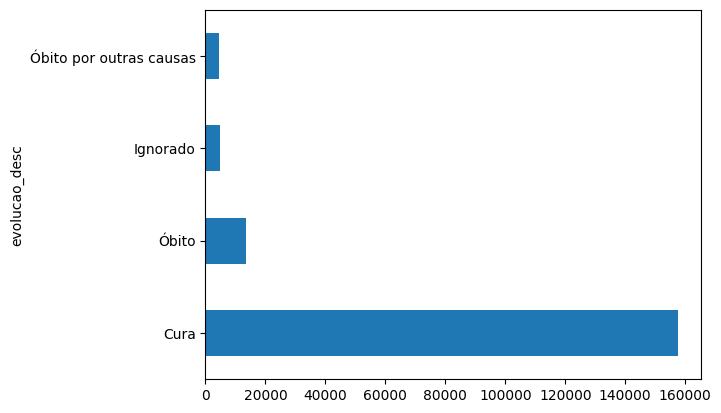

In [125]:
df_filtered['evolucao_desc'].value_counts().plot(kind='barh')
plt.show()

### Classificação Final

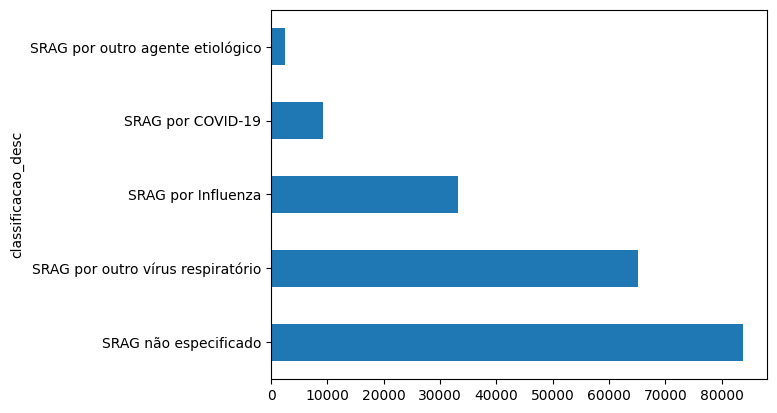

In [127]:
df_filtered['classificacao_desc'].value_counts().plot(kind='barh')
plt.show()

### UTI

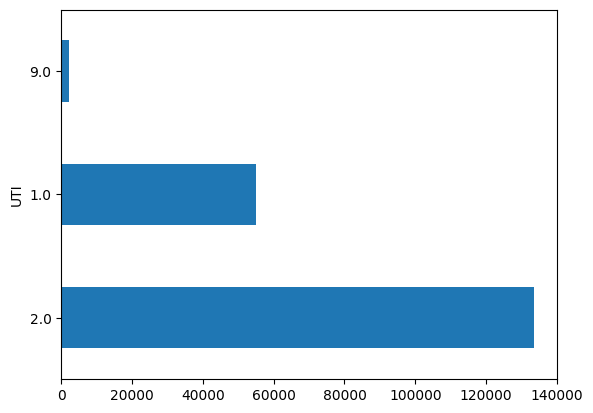

In [133]:
df_filtered['UTI'].value_counts().plot(kind='barh')
plt.show()

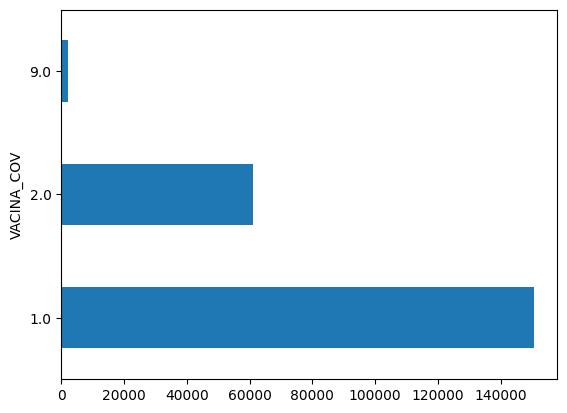

In [134]:
df_filtered['VACINA_COV'].value_counts().plot(kind='barh')
plt.show()